# Loading Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [ ]:
df = pd.read_csv("/content/CW1_data_202223.csv")

# Simple Data Inspection

In [ ]:
# checking the data
df.head()

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,"£2,645.30",55,227,1
1,116249,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,"£1,151.90",26,29,0
2,255006,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,"£2,265.90",152,166,0
3,317475,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,"£1,456.60",151,277,0
4,344213,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,£131.50,154,155,0


In [ ]:
# checking shape of data
df.shape

(304887, 12)

In [ ]:
#checking all datatypes
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB


In [ ]:
# creating list of numerical and catogrical data for better understanding
numeric_dtype = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtype:
        if i in ['Unnamed: 0', 'id']:
            pass
        else:
            numeric.append(i)
C = (df.dtypes == 'object')
category = list(C[C].index)

print("Numerical Data:",numeric)
print("Categorical Data:",category)

Numerical Data: ['Age', 'HasDrivingLicense', 'RegionID', 'Switch', 'SalesChannelID', 'DaysSinceCreated', 'Result']
Categorical Data: ['Gender', 'VehicleAge', 'PastAccident', 'AnnualPremium']


In [ ]:
# 'AnnualPremium' has to be transformed to numeric structure.
df['AnnualPremium'] = df['AnnualPremium'].str.replace('£', '').str.replace(',', '').astype(float)

In [ ]:
# checking statistics of the dataset
df.describe()

,id,Age,HasDrivingLicense,RegionID,Switch,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
count,304887.000000,274339.000000,274399.000000,274334.000000,152557.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,190594.098072,38.832561,0.997853,26.408892,0.458281,1528.592566,111.966591,154.272609,0.121970
std,110022.144283,15.504062,0.046281,13.213345,0.498258,862.712194,54.230069,83.642389,0.327251
min,1.000000,20.000000,0.000000,0.000000,0.000000,131.500000,1.000000,10.000000,0.000000
25%,95342.500000,25.000000,1.000000,15.000000,0.000000,1220.325000,26.000000,82.000000,0.000000
50%,190639.000000,36.000000,1.000000,28.000000,0.000000,1583.750000,131.000000,154.000000,0.000000
75%,285785.500000,49.000000,1.000000,35.000000,1.000000,1970.700000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,27008.250000,163.000000,299.000000,1.000000


In [ ]:
# checking the duplicate values
df.duplicated().sum()

0

In [ ]:
# checking the null values in each column
values_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value = pd.DataFrame({'column_name': df.columns,'values_missing':values_missing ,'percent_missing': percent_missing})
missing_value = missing_value[missing_value['percent_missing'] > 0]
a= missing_value.sort_values(by='percent_missing', ascending=False)
a

,column_name,values_missing,percent_missing
PastAccident,PastAccident,152465,50.007052
Switch,Switch,152330,49.962773
RegionID,RegionID,30553,10.021090
Age,Age,30548,10.019450
HasDrivingLicense,HasDrivingLicense,30488,9.999770
VehicleAge,VehicleAge,30441,9.984355
Gender,Gender,30427,9.979763


# Dropping Unnecessary Columns

In [ ]:
#df.drop(['id','SalesChannelID','DaysSinceCreated'], axis=1, inplace = True)    # dropping column which is not required


# Handling Missing Values

In [ ]:
df.isnull().sum()

id                       0
Gender                   0
Age                      0
HasDrivingLicense        0
RegionID             30553
Switch                   0
VehicleAge               0
PastAccident             0
AnnualPremium            0
SalesChannelID           0
DaysSinceCreated         0
Result                   0
dtype: int64

GENDER

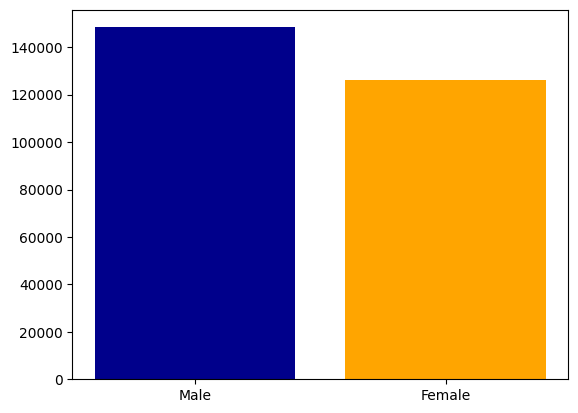

In [ ]:
#GENDER
# counting of each gender
counts = df['Gender'].value_counts()
counts
# bar chart for gender count
plt.bar(counts.index, counts.values, color = ['darkblue', 'orange'])
plt.show()


from above, we can see the male is more than female. So when we try to fill the missing gender data, we don't want to distort the distribution of the dataset.Hence, I will use a mode gender to fill the missing age data. I am using Sklearn simpleimputer

In [ ]:
from sklearn.impute import SimpleImputer
# Fill missing gender values with the most_frequent
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Gender']])
df['Gender'] = imputer.transform(df[['Gender']])

AGE

In [ ]:
# AGE
# ploting age distribution graph
sns.distplot(df.loc[(df['Gender']=='Male'), 'Age'], kde_kws={"color": "b", "lw": 1, "label": "Male"})
sns.distplot(df.loc[(df['Gender'] == 'Female'), 'Age'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Age distribution by Gender', fontsize = 15)
plt.show()

From above, we can see that the famle younger than 30 is more and the male older than 30 is more. Maybe we can fill the missing age according gender, but it is not a good idea, which may contribute overfitting. Hence, I will use a median age to fill the missing age data.

In [ ]:
# Fill missing age values with the median value
median = df['Age'].median()
df['Age'] = df['Age'].fillna(median)

HasDrivingLicense

In [ ]:
#HasDrivingLicense
# counting of each gender
counts = df['HasDrivingLicense'].value_counts()
counts

1.0    273810
0.0       589
Name: HasDrivingLicense, dtype: int64

From above, we can see that near 99% customers own a driving license. What's more, it's normal to own a driving license. Hence, I will fill the missing data with 1.

In [ ]:
# Fill missing has driving license values with yes means 1
df['HasDrivingLicense'] = df['HasDrivingLicense'].fillna(1)

RegionID

<Axes: xlabel='RegionID', ylabel='Count'>

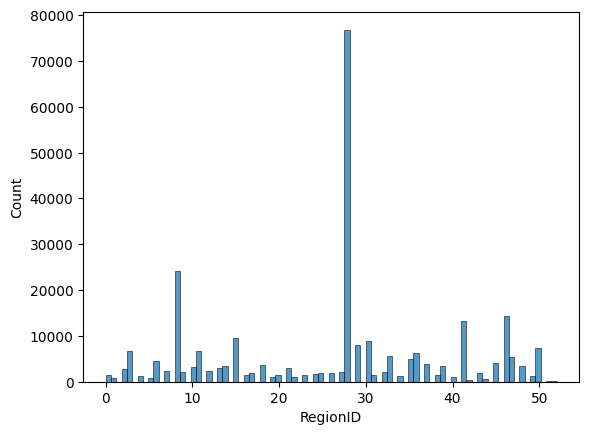

In [ ]:
# ploting RegionID distribution graph
sns.histplot(df.RegionID)

from above, we can see the region 28 most repeated region.Hence, I will use a mode regionid to fill the missing region data.(using simpleimputer)

In [ ]:
# Fill missing region values with mode
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['RegionID']])
df['RegionID'] = imputer.transform(df[['RegionID']])

Switch

In [ ]:
# switch distribution
df.Switch.value_counts()

-1.0    152330
 0.0     82643
 1.0     69914
Name: Switch, dtype: int64

Becase of missing data alomst 50%, it is hard to decide how to fill a constant value. Hence, I replace the missing values in a given column with a other contant value which is -1

In [ ]:
# Fill missing switch values with new constant
df['Switch'] = df['Switch'].fillna(-1)

VehicleAge

In [ ]:
# counting vlaues for vehicle age
df['VehicleAge'].value_counts()

# ploting RegionID distribution graph
#sns.histplot(df.VehicleAge)

1-2 Year     144374
< 1 Year     118528
> 2 Years     11544
Name: VehicleAge, dtype: int64

from above, we can see the 1-2 years vehicle age is most repeated age. Hence, I will use a mode to fill the missing vehicle age data. I am using sklearn simpleImputer for this

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['VehicleAge']])
df['VehicleAge'] = imputer.transform(df[['VehicleAge']])

PastAccident

In [ ]:
# counting vlaues for past accident
df.PastAccident.value_counts()

Yes    76976
No     75446
Name: PastAccident, dtype: int64

Becase of missing data is 50%, it is hard to decide how to fill a constant value. Hence, I replace the missing values in a given column with a other value which is 'Unknown'.

In [ ]:
# Fill missing switch values with new 'Unknown'
df['PastAccident'] = df['PastAccident'].fillna("Unknown",inplace=False)

In [ ]:
df.isnull().sum()

id                   0
Gender               0
Age                  0
HasDrivingLicense    0
RegionID             0
Switch               0
VehicleAge           0
PastAccident         0
AnnualPremium        0
SalesChannelID       0
DaysSinceCreated     0
Result               0
dtype: int64

# Data Encoding

In [ ]:
# Replace 'Male' with 1 and 'Female' with 0 in the 'Gender' column
df["Gender"].replace({'Male':1,'Female':0}, inplace=True)

In [ ]:
# Replace '> 2 Years' with 2 and '1-2 Year' with 1 and '< 1 Year'  with 0 in the 'vehicleage' column
df["VehicleAge"].replace({'> 2 Years':2,'1-2 Year':1,'< 1 Year':0}, inplace=True)

In [ ]:
# Replace 'Yes' with 1 and 'No' with 0 and 'Unknown'  with 2 in the 'vehicleage' column
df["PastAccident"].replace({'Yes':1,'No':0,'Unknown':2}, inplace=True)

In [ ]:
df.head()

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,0,39.0,1.0,15.0,0.0,1-2 Year,2,2645.3,55,227,1
1,116249,1,38.0,1.0,11.0,-1.0,1-2 Year,2,1151.9,26,29,0
2,255006,1,22.0,1.0,30.0,-1.0,< 1 Year,2,2265.9,152,166,0
3,317475,0,23.0,1.0,28.0,-1.0,< 1 Year,2,1456.6,151,277,0
4,344213,1,56.0,1.0,48.0,0.0,> 2 Years,2,131.5,154,155,0


# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMax_scale = MinMaxScaler()   # to default range [0, 1]
df['Age'] = minMax_scale.fit_transform(df[['Age']])


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scale = StandardScaler()   # to default 0 mean and 1 standard deviation
df['AnnualPremium'] = standard_scale.fit_transform(df[['AnnualPremium']])

standard_scale = StandardScaler()
df['RegionID'] = standard_scale.fit_transform(df[['RegionID']])

# Data Exploration

In [ ]:
df.corr()

,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,Result
Gender,1.000000,0.126006,-0.016446,0.001716,-0.023615,0.136976,0.026728,0.002995,0.049026
Age,0.126006,1.000000,-0.069481,0.040281,-0.072147,0.672064,0.075315,0.064370,0.106053
HasDrivingLicense,-0.016446,-0.069481,1.000000,-0.001727,0.006518,-0.030476,-0.002307,-0.013531,0.009046
RegionID,0.001716,0.040281,-0.001727,1.000000,-0.007017,0.040737,0.009743,-0.010064,0.011969
Switch,-0.023615,-0.072147,0.006518,-0.007017,1.000000,-0.103575,-0.074993,0.004750,-0.093667
VehicleAge,0.136976,0.672064,-0.030476,0.040737,-0.103575,1.000000,0.110692,0.038623,0.205422
PastAccident,0.026728,0.075315,-0.002307,0.009743,-0.074993,0.110692,1.000000,-0.000159,0.106470
AnnualPremium,0.002995,0.064370,-0.013531,-0.010064,0.004750,0.038623,-0.000159,1.000000,0.023787
Result,0.049026,0.106053,0.009046,0.011969,-0.093667,0.205422,0.106470,0.023787,1.000000


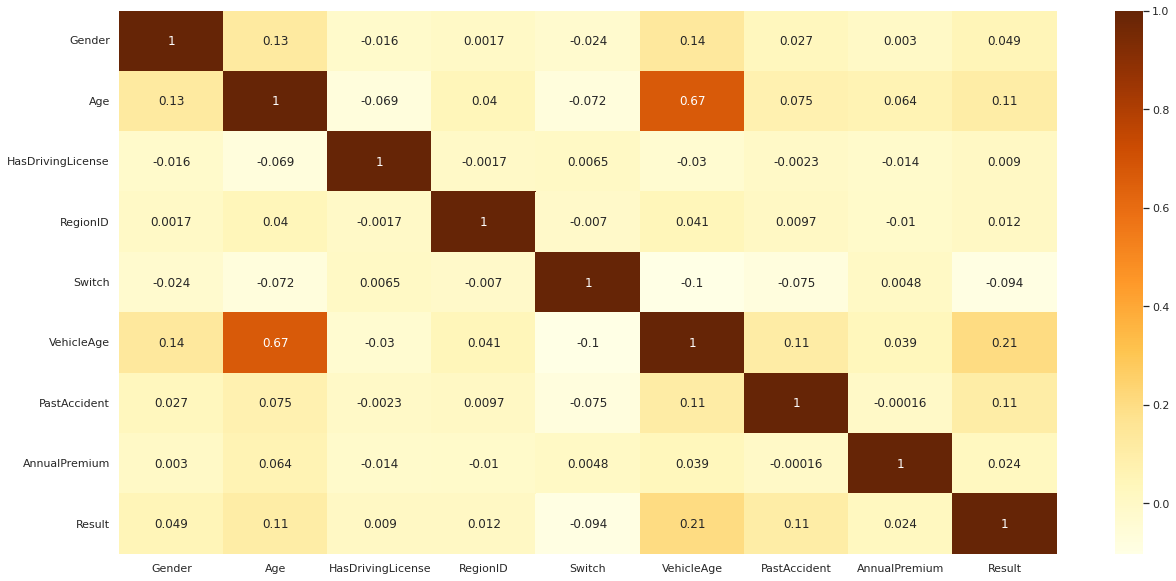

In [ ]:
sns.set(rc = {'figure.figsize':(21,10)})
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


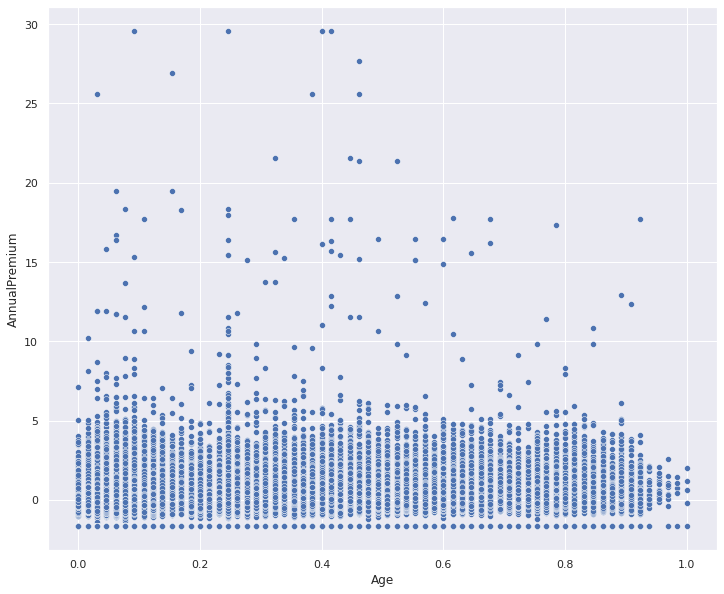

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(df['Age'],df['AnnualPremium'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

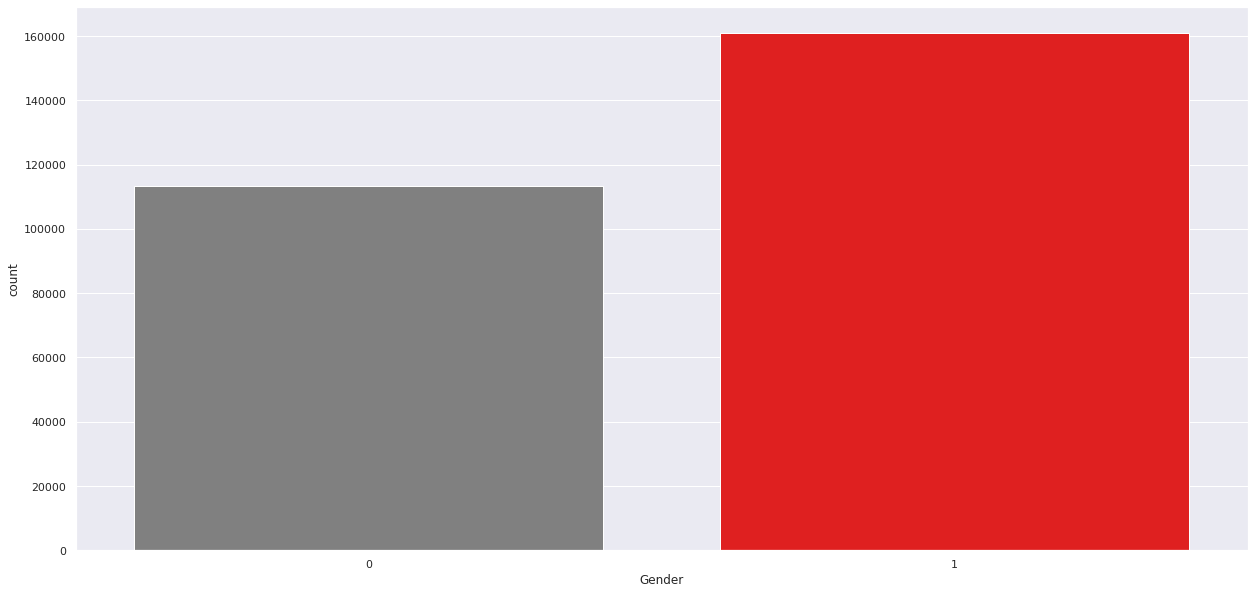

<Figure size 720x576 with 0 Axes>

In [ ]:
cols=['grey','red']
sns.countplot(df.Gender,palette=cols)
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

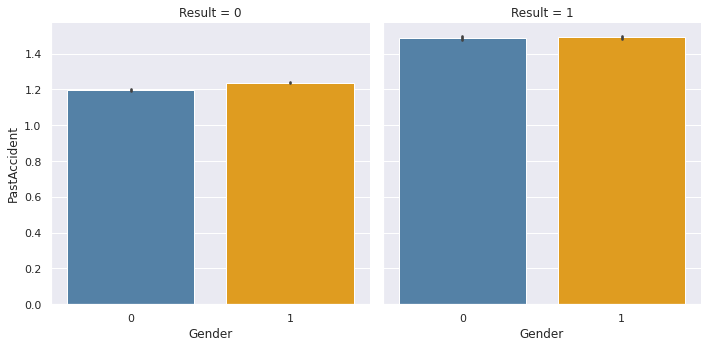

<Figure size 720x576 with 0 Axes>

In [ ]:
cols=['steelblue','orange']
sns.catplot(x="Gender", y="PastAccident",col="Result",
                data=df, kind="bar",palette=cols)
plt.figure(figsize=(10,8))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 792x720 with 0 Axes>

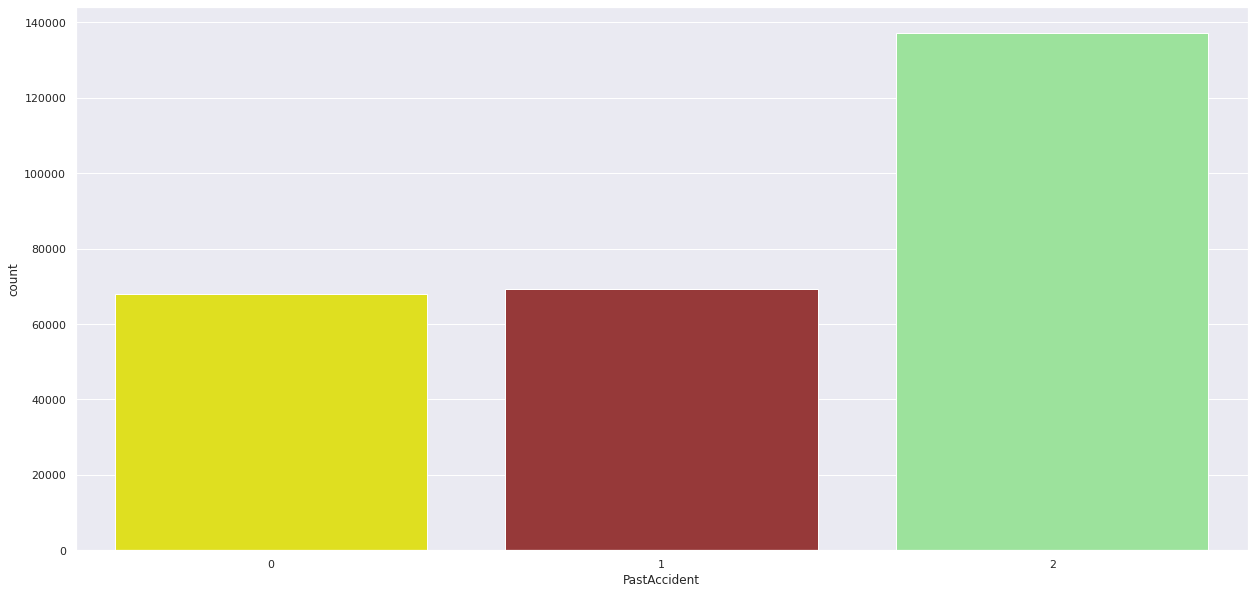

<Figure size 792x720 with 0 Axes>

In [ ]:
cols=['yellow','brown','lightgreen']
sns.countplot(df.PastAccident, palette=cols)
plt.figure(figsize=(11,10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 792x720 with 0 Axes>

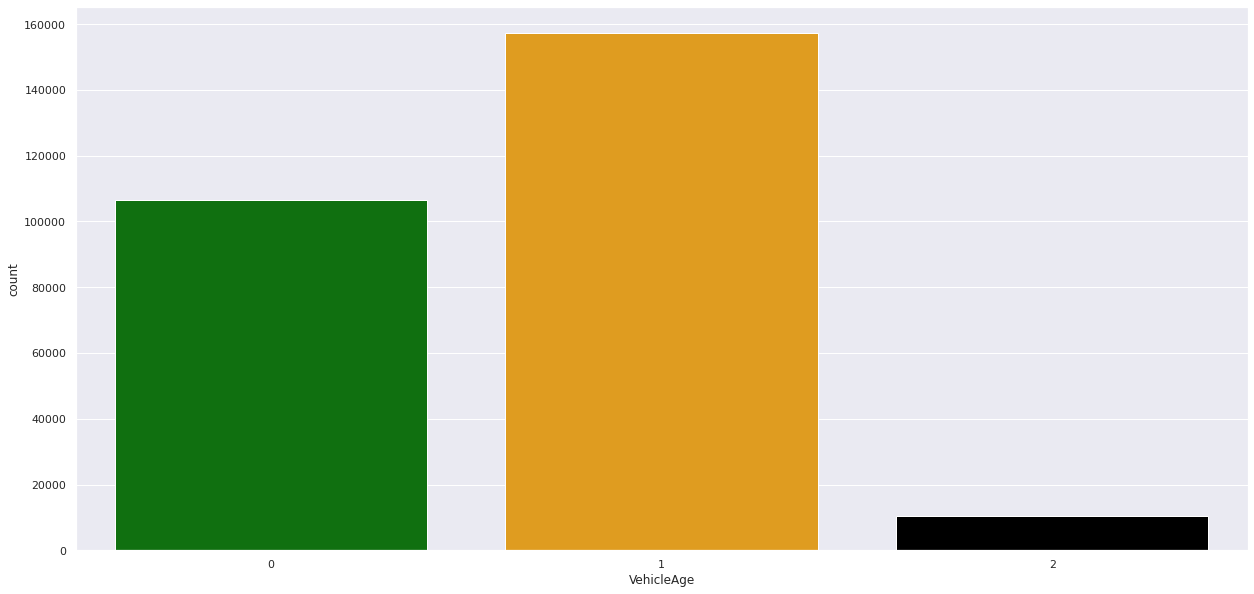

<Figure size 792x720 with 0 Axes>

In [ ]:
cols=['green','orange','black']
sns.countplot(df.VehicleAge,palette=cols)
plt.figure(figsize=(11,10))

Text(0, 0.5, 'Count')

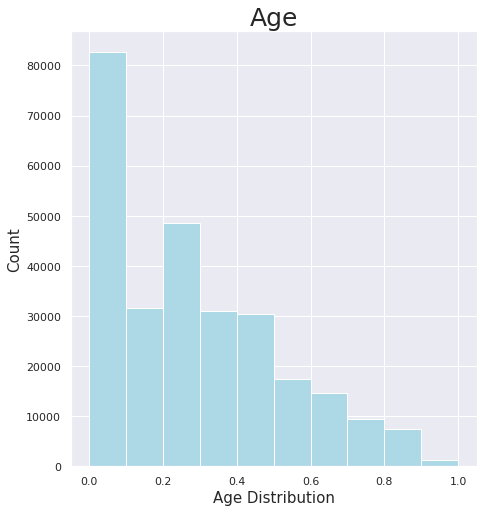

In [ ]:
plt.rcParams['figure.figsize'] = (16, 8)

plt.subplot(1, 2, 1)
plt.hist(df['Age'], color = 'lightblue')
plt.title('Age',fontsize = 25)
plt.xlabel('Age Distribution', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x720 with 0 Axes>

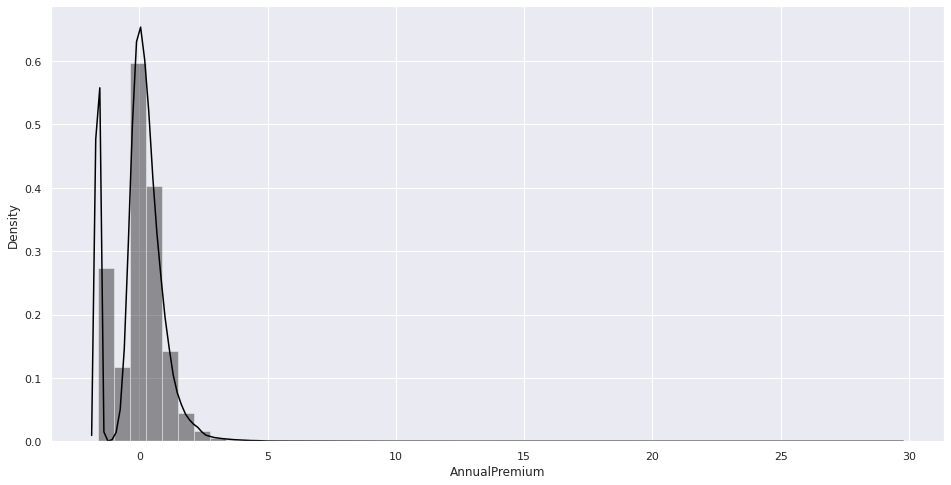

<Figure size 864x720 with 0 Axes>

In [ ]:
sns.distplot(df.AnnualPremium, color= 'Black')
plt.figure(figsize=(12,10))

Text(0, 0.5, '')

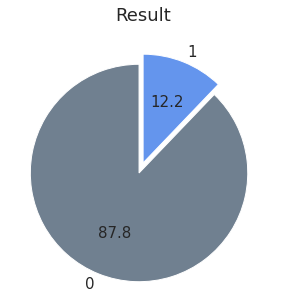

In [ ]:
plt.figure(figsize=(10,5))
df['Result'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])
plt.title('Result', fontsize = 18)
plt.ylabel('')

# Outliers

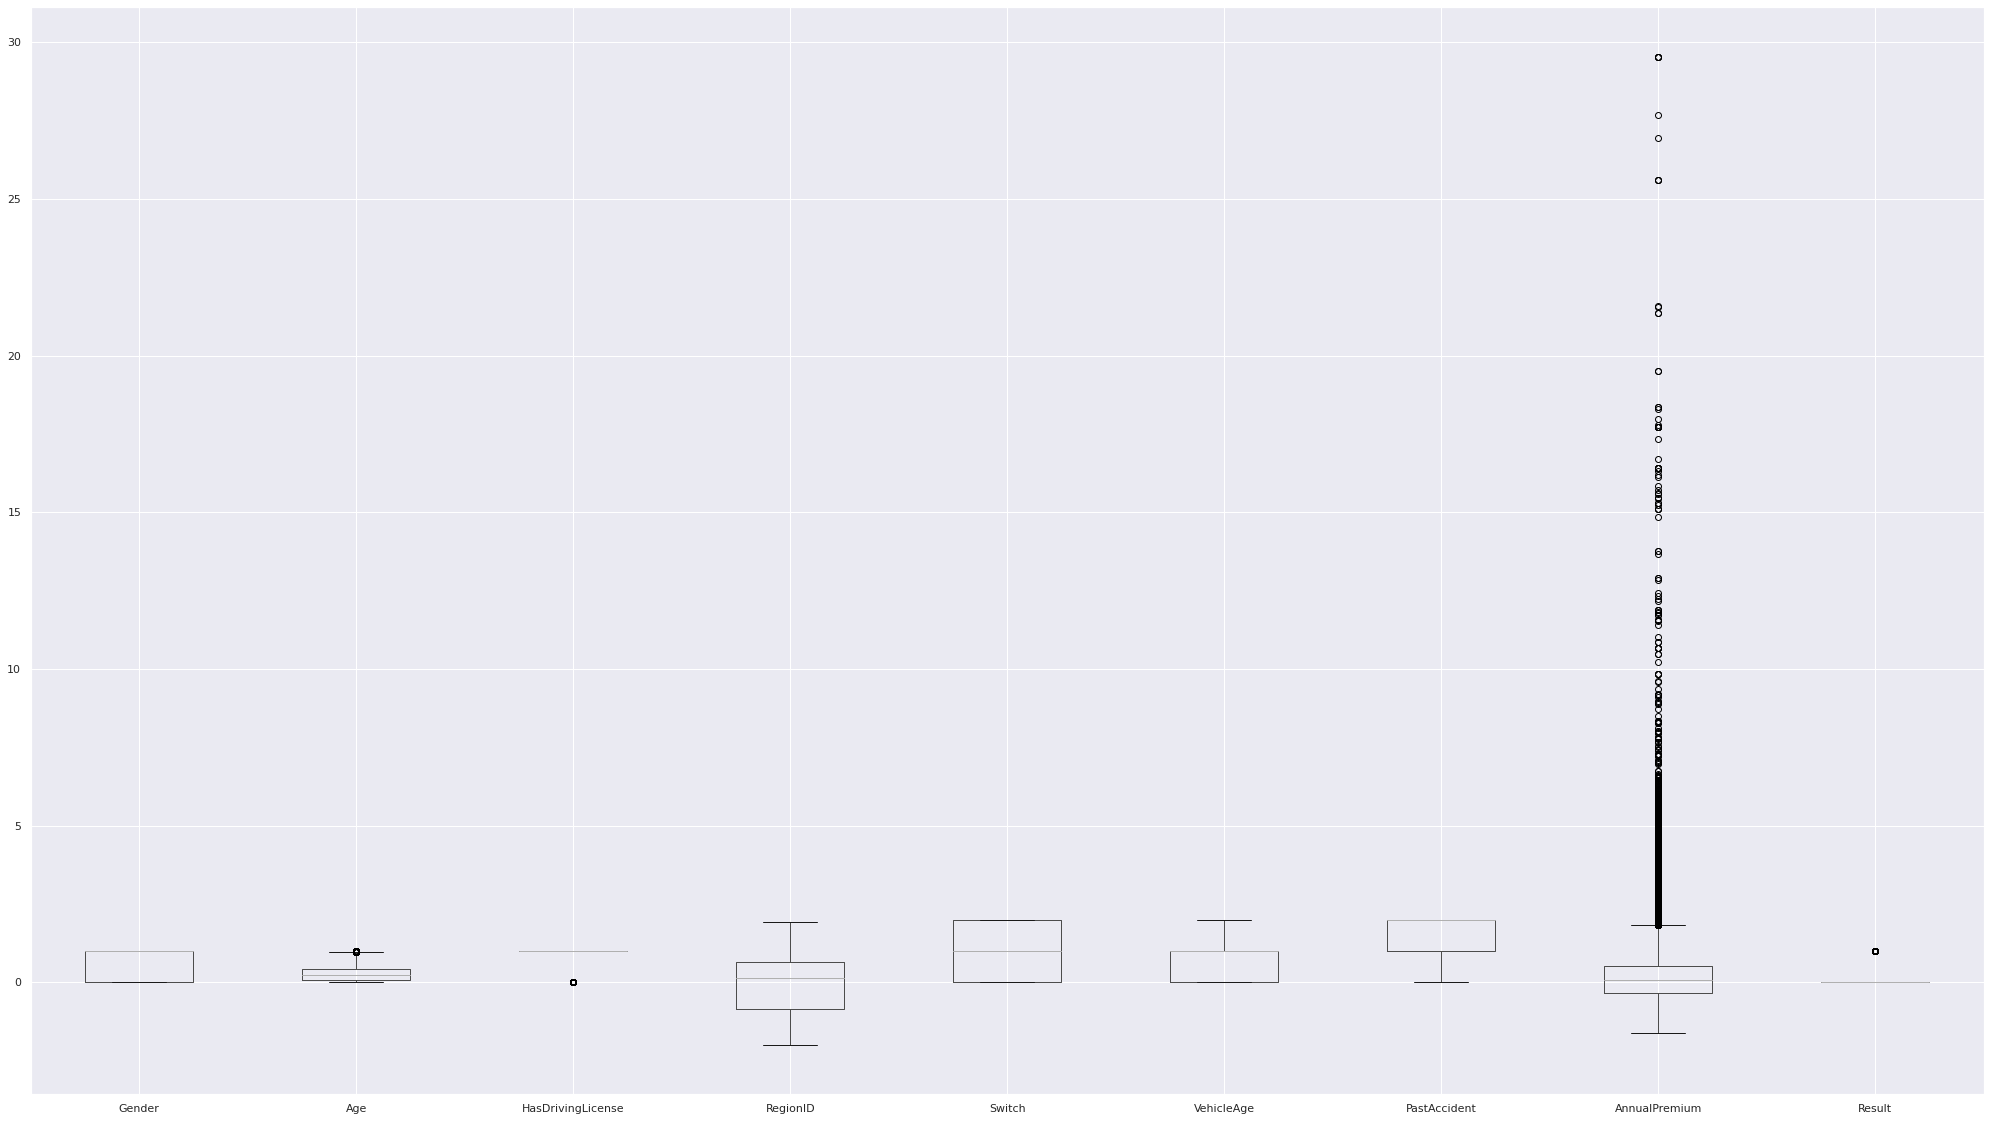

In [ ]:
plt.figure(figsize=(35,20))
df.boxplot()

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
outlier_per=[]
for i in df:
    data_mean, data_std = mean(df[i]), std(df[i])
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i,': \n')
# identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]

    number_out=len(outliers)
    print('Identified outliers: %d' % number_out)
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    number_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % number_nout)
    outlier_percent=(number_out/(number_out+number_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    outlier_per.append(outlier_percent)

Gender : 

Identified outliers: 0
Non-outlier observations: 274334
Percent of outlers: 0.0 

Age : 

Identified outliers: 21
Non-outlier observations: 274313
Percent of outlers: 0.007654902418220126 

HasDrivingLicense : 

Identified outliers: 588
Non-outlier observations: 273746
Percent of outlers: 0.21433726771016354 

RegionID : 

Identified outliers: 0
Non-outlier observations: 274334
Percent of outlers: 0.0 

Switch : 

Identified outliers: 0
Non-outlier observations: 274334
Percent of outlers: 0.0 

VehicleAge : 

Identified outliers: 0
Non-outlier observations: 274334
Percent of outlers: 0.0 

PastAccident : 

Identified outliers: 0
Non-outlier observations: 274334
Percent of outlers: 0.0 

AnnualPremium : 

Identified outliers: 1503
Non-outlier observations: 272831
Percent of outlers: 0.5478723016468976 

Result : 

Identified outliers: 0
Non-outlier observations: 274334
Percent of outlers: 0.0 



# Dividing and Balancing Data into Train and Test

In [ ]:
x = df[['Gender','Age','HasDrivingLicense','RegionID','Switch','VehicleAge','PastAccident','AnnualPremium']]

In [ ]:
y = df[['Result']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority',random_state=3)

x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts() # count before smote

Result
0         161521
1          22282
dtype: int64

In [ ]:
y_train_sm.value_counts() # count after smote

Result
0         161521
1         161521
dtype: int64

In [ ]:
x_test.count()


Gender               90531
Age                  90531
HasDrivingLicense    90531
RegionID             90531
Switch               90531
VehicleAge           90531
PastAccident         90531
AnnualPremium        90531
dtype: int64

# Modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

kNN = KNeighborsClassifier()
kNN.fit(x_train_sm,y_train_sm)

y_pred = kNN.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("\n KNN Accuracy : ", metrics.accuracy_score(y_test,y_pred))


 KNN Accuracy :  0.7327987098342005



 KNN Accuracy :  0.7327987098342005
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     79448
           1       0.24      0.55      0.33     11083

    accuracy                           0.73     90531
   macro avg       0.58      0.65      0.58     90531
weighted avg       0.84      0.73      0.77     90531



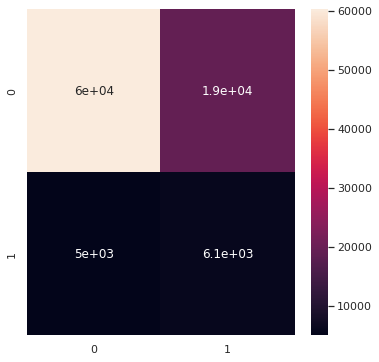

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
kNN_cl_report = classification_report(y_test, y_pred)
print("\n KNN Accuracy : ", metrics.accuracy_score(y_test,y_pred))
print(kNN_cl_report)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
rfclf.fit(x_train_sm,y_train_sm)
y_pred = rfclf.predict(x_test)

<ipython-input-53-30066a854316>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf.fit(x_train_sm,y_train_sm)


In [ ]:
print("\n RandomForestClassifier Accuracy : ", metrics.accuracy_score(y_test,y_pred))


 RandomForestClassifier Accuracy :  0.8068175542079509



 RandomForestClassifier Accuracy :  0.8068175542079509
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     79448
           1       0.27      0.33      0.29     11083

    accuracy                           0.81     90531
   macro avg       0.58      0.60      0.59     90531
weighted avg       0.83      0.81      0.82     90531



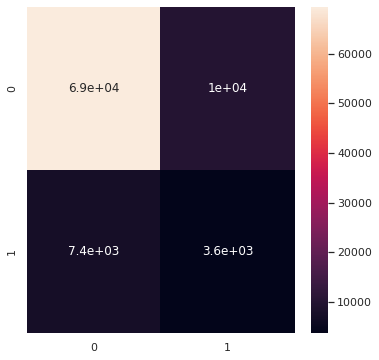

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
rfclf_cl_report = classification_report(y_test, y_pred)
print("\n RandomForestClassifier Accuracy : ", metrics.accuracy_score(y_test,y_pred))
print(rfclf_cl_report)

In [ ]:
from sklearn.linear_model import LogisticRegression
logRE = LogisticRegression()
logRE.fit(x_train_sm,y_train_sm)
y_pred = logRE.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("\n LogisticRegression Accuracy : ", metrics.accuracy_score(y_test,y_pred))


 LogisticRegression Accuracy :  0.620969612618882



 LogisticRegression Accuracy :  0.620969612618882
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     79448
           1       0.20      0.71      0.31     11083

    accuracy                           0.62     90531
   macro avg       0.57      0.66      0.53     90531
weighted avg       0.85      0.62      0.69     90531



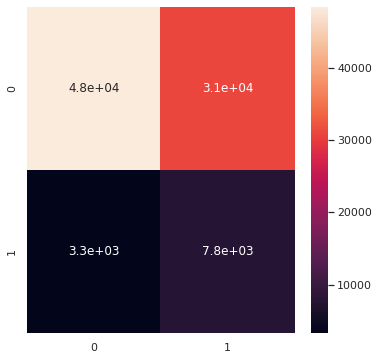

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
logRE_cl_report = classification_report(y_test, y_pred)
print("\n LogisticRegression Accuracy : ", metrics.accuracy_score(y_test,y_pred))
print(logRE_cl_report)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

from sklearn.neighbors import KNeighborsClassifier
kNN_sm=KNeighborsClassifier(n_neighbors=6)

from sklearn.ensemble import RandomForestClassifier
rfclf_sm=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.linear_model import LogisticRegression
LogRE_sm=LogisticRegression()



In [ ]:
models_sm=[]
models_sm.append(('KNN',kNN_sm))
models_sm.append(('Random Forest Classifier',rfclf_sm))
models_sm.append(('Logistic Regression',LogRE_sm))



In [ ]:
x_train_sm=np.array(x_train_sm)
y_train_sm=np.array(y_train_sm)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
acc_train_sm=[]
auc_train_sm=[]

acc_test_sm=[]
auc_test_sm=[]
names_sm=[]
def model_eval(name,algo, xtrain,ytrain,xtest,ytest):
    names_sm.append(name)

    algo.fit(xtrain,ytrain)
    ytrain_pred =algo.predict(xtrain)
    ytrain_prob = algo.predict_proba(xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(xtest)
    ytest_prob = algo.predict_proba(xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))

In [ ]:
for name,algo in models_sm:
    model_eval(name,algo,x_train_sm,y_train_sm,x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-62-b8c52b81c40e>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo.fit(xtrain,ytrain)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
results_sm_df=pd.DataFrame({'Model':names_sm,

                           'Accuracy Score Train':acc_train_sm,
                           'ROC-AUC Score Train':auc_train_sm,

                           'Accuracy Score Test':acc_test_sm,
                           'ROC-AUC Score Test':auc_test_sm
                            })

# Model Results

In [ ]:
results_sm_df

,Model,Accuracy Score Train,ROC-AUC Score Train,Accuracy Score Test,ROC-AUC Score Test
0,KNN,0.874385,0.953823,0.752947,0.729893
1,Random Forest Classifier,0.989751,0.999101,0.806895,0.765358
2,Logistic Regression,0.657029,0.705799,0.620970,0.704543
